In [40]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
#pip install pandas_datareader –––-> Para instalar el paquete pandas_datereader.
from pandas_datareader import data
from pulp import *


In [42]:
#creamos una lista con las empresas a evaluar, vamos a tomar los instrumentos descargados... 10 en total
lstComponentes = ['DIS','BKNG','STZ','COP','SPGI','JNJ','IEX','FMC','XEL','^GSPC']


In [73]:
data_instrumentos = pd.read_csv('./data/instrumentos_data.csv')

In [74]:
data_instrumentos.dtypes

Unnamed: 0      int64
Date           object
DIS           float64
BKNG          float64
STZ           float64
COP           float64
SPGI          float64
JNJ           float64
IEX           float64
FMC           float64
XEL           float64
^GSPC         float64
dtype: object

In [75]:
#convierte la fecha de str a datetie
data_instrumentos['Date'] = pd.to_datetime(data_instrumentos['Date'])
#y convierte la columna a indice
data_instrumentos.set_index('Date',inplace=True)

In [76]:

data_instrumentos.drop('Unnamed: 0', axis=1,inplace=True)
data_instrumentos.head()

,DIS,BKNG,STZ,COP,SPGI,JNJ,IEX,FMC,XEL,^GSPC
Date,,,,,,,,,,
2000-02-25,23.985699,341.250,5.488533,6.818963,15.235835,19.954931,7.252949,4.340192,6.742470,1333.359985
2000-02-28,25.339733,323.250,5.537851,6.865192,15.256334,20.162794,7.469162,4.369244,6.910436,1348.050049
2000-02-29,26.306902,335.625,5.523761,7.050111,16.691746,19.954931,7.783652,4.491256,6.742470,1366.420044
2000-03-01,26.838844,386.250,5.601263,7.154132,16.445673,20.336016,8.098139,4.520309,6.598505,1379.189941
2000-03-02,26.693764,429.000,5.439213,7.038556,16.507195,20.422628,7.901585,4.479635,6.550517,1381.760010


In [77]:
data_instrumentos.dtypes

DIS      float64
BKNG     float64
STZ      float64
COP      float64
SPGI     float64
JNJ      float64
IEX      float64
FMC      float64
XEL      float64
^GSPC    float64
dtype: object

In [48]:
data_instrumentos.tail()

,DIS,BKNG,STZ,COP,SPGI,JNJ,IEX,FMC,XEL,^GSPC
Date,,,,,,,,,,
2023-02-21,102.089996,2425.489990,223.110001,105.309998,349.878082,158.000000,224.880005,126.139999,67.199997,3997.340088
2023-02-22,101.680000,2426.709961,222.119995,104.080002,345.300018,157.779999,224.850006,128.729996,66.690002,3991.050049
2023-02-23,101.730003,2426.489990,225.600006,105.430000,348.130005,157.729996,225.690002,129.080002,66.330002,4012.320068
2023-02-24,100.300003,2452.479980,224.089996,105.250000,343.380005,155.970001,224.839996,128.869995,65.809998,3970.040039
2023-02-27,100.449997,2521.080078,224.690002,105.860001,341.510010,155.630005,225.220001,129.220001,65.400002,3982.239990


In [78]:
#vamos  utilizar sólamente de 2015 a la fecha... para disminuir la volatilidad. ya que en el primer ejercicio tomando 2000 a 
#la fecha salió una volatilidad de mas de 1000% 

data_instrumentos = data_instrumentos[data_instrumentos.index >= '2015-01-01']
data_instrumentos

,DIS,BKNG,STZ,COP,SPGI,JNJ,IEX,FMC,XEL,^GSPC
Date,,,,,,,,,,
2015-01-02,87.376266,1142.060059,87.929230,53.013329,81.373520,83.703011,69.953903,43.645042,28.322765,2058.199951
2015-01-05,86.099403,1097.579956,90.021507,50.490330,79.932541,83.118423,68.166428,42.687420,28.001270,2020.579956
2015-01-06,85.642700,1079.959961,90.598686,48.405800,78.776108,82.709991,66.747223,42.963215,28.150255,2002.609985
2015-01-07,86.518791,1069.569946,92.934448,48.728859,79.822433,84.535889,67.196342,43.284985,28.393332,2025.900024
2015-01-08,87.413544,1082.849976,97.073860,49.944202,80.538315,85.200584,68.283180,44.357525,28.722679,2062.139893
...,...,...,...,...,...,...,...,...,...,...
2023-02-21,102.089996,2425.489990,223.110001,105.309998,349.878082,158.000000,224.880005,126.139999,67.199997,3997.340088
2023-02-22,101.680000,2426.709961,222.119995,104.080002,345.300018,157.779999,224.850006,128.729996,66.690002,3991.050049
2023-02-23,101.730003,2426.489990,225.600006,105.430000,348.130005,157.729996,225.690002,129.080002,66.330002,4012.320068


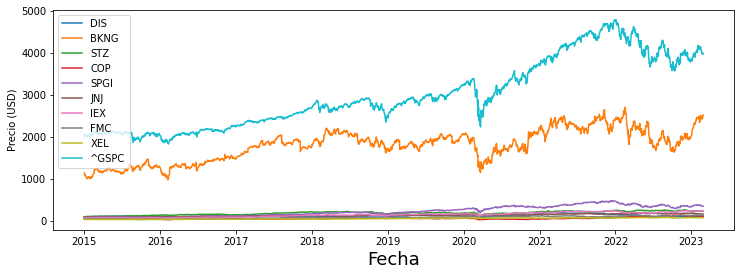

In [79]:
#graficamos
plt.figure(figsize=(12.2,4.05))
for instrumento in data_instrumentos.columns.values:
    plt.plot(data_instrumentos[instrumento], label=instrumento)

plt.title = 'Precio de las acciones'
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio (USD)')
plt.legend(data_instrumentos.columns.values)
plt.show()


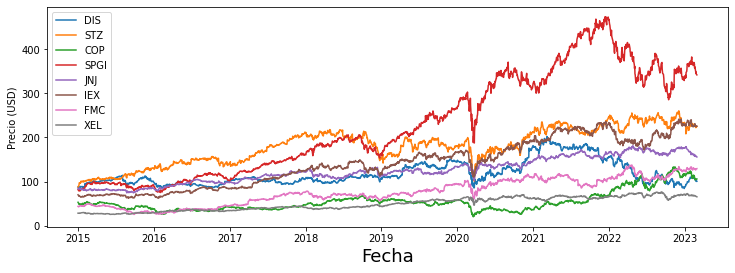

In [80]:
data_instrumentos2 = data_instrumentos[['DIS','STZ','COP','SPGI','JNJ','IEX','FMC','XEL']]
plt.figure(figsize=(12.2,4.05))
for instrumento in data_instrumentos2.columns.values:
    plt.plot(data_instrumentos2[instrumento], label=instrumento)

plt.title = 'Precio de las acciones'
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio (USD)')
plt.legend(data_instrumentos2.columns.values)
plt.show()

Dada la diferencia de precios, eliminamos los instrumentos de mayor precio, para poder apreciar el detalle del resto de las acciones.

Desde la gráfica anterior podemos observar la caída en el precio de las acciones, de manera generalizada a principios de año 2020, ¿ubicas por qué? claro, el inicio de la pandemia a nivel mundial.

Aunque el precio es importante, hay que observar el retorno anual de cada una de las acciones

In [81]:
data_instrumentos = np.log(data_instrumentos).diff()
data_instrumentos = data_instrumentos.dropna()
data_instrumentos

,DIS,BKNG,STZ,COP,SPGI,JNJ,IEX,FMC,XEL,^GSPC
Date,,,,,,,,,,
2015-01-05,-0.014721,-0.039726,0.023516,-0.048762,-0.017867,-0.007009,-0.025884,-0.022185,-0.011416,-0.018447
2015-01-06,-0.005318,-0.016184,0.006391,-0.042162,-0.014573,-0.004926,-0.021039,0.006440,0.005307,-0.008933
2015-01-07,0.010178,-0.009667,0.025455,0.006652,0.013195,0.021836,0.006706,0.007462,0.008598,0.011563
2015-01-08,0.010289,0.012340,0.043578,0.024635,0.008928,0.007832,0.016045,0.024477,0.011533,0.017730
2015-01-09,0.004892,-0.028941,-0.002791,-0.000154,-0.008584,-0.013723,-0.012442,-0.006237,-0.012361,-0.008439
...,...,...,...,...,...,...,...,...,...,...
2023-02-21,-0.030199,-0.014945,-0.016404,0.011364,-0.028219,-0.015013,-0.026851,-0.016199,-0.011982,-0.020245
2023-02-22,-0.004024,0.000503,-0.004447,-0.011749,-0.013171,-0.001393,-0.000133,0.020325,-0.007618,-0.001575
2023-02-23,0.000492,-0.000091,0.015546,0.012887,0.008162,-0.000317,0.003729,0.002715,-0.005413,0.005315


Volvemos a graficar el precio de las acciones

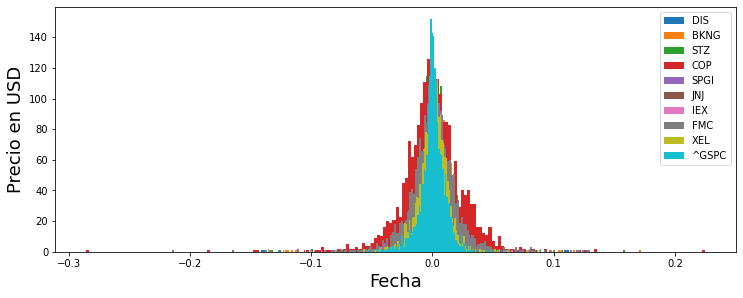

In [82]:
plt.figure(figsize=(12.2,4.5)) 
for i in data_instrumentos.columns.values:
    plt.hist( data_instrumentos[i],  label=i, bins = 200)
#plt.title('Histograma de los retornos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(data_instrumentos.columns.values)
#plt.savefig('plotretornosnormales.png', dpi=300, bbox_inches='tight')
plt.show()

Vamos a calcular los retornos esperados, utilizando el modelo CAPM (Capital Asset Price Model). po lo cual utilizaremos como elemento de comparación el rendimiento del S&P500 (para ello lo dejamos en la última columna de nuestro dataframe)

In [54]:
#importamos la librerpia pyportfolioopt
import pypfopt

In [83]:
#separamos los dataframe, uno con activos y el otro con el indicador.
data_valores = data_instrumentos.loc[: , data_instrumentos.columns != '^GSPC']
data_valores

,DIS,BKNG,STZ,COP,SPGI,JNJ,IEX,FMC,XEL
Date,,,,,,,,,
2015-01-05,-0.014721,-0.039726,0.023516,-0.048762,-0.017867,-0.007009,-0.025884,-0.022185,-0.011416
2015-01-06,-0.005318,-0.016184,0.006391,-0.042162,-0.014573,-0.004926,-0.021039,0.006440,0.005307
2015-01-07,0.010178,-0.009667,0.025455,0.006652,0.013195,0.021836,0.006706,0.007462,0.008598
2015-01-08,0.010289,0.012340,0.043578,0.024635,0.008928,0.007832,0.016045,0.024477,0.011533
2015-01-09,0.004892,-0.028941,-0.002791,-0.000154,-0.008584,-0.013723,-0.012442,-0.006237,-0.012361
...,...,...,...,...,...,...,...,...,...
2023-02-21,-0.030199,-0.014945,-0.016404,0.011364,-0.028219,-0.015013,-0.026851,-0.016199,-0.011982
2023-02-22,-0.004024,0.000503,-0.004447,-0.011749,-0.013171,-0.001393,-0.000133,0.020325,-0.007618
2023-02-23,0.000492,-0.000091,0.015546,0.012887,0.008162,-0.000317,0.003729,0.002715,-0.005413


In [84]:
data_benchmark = data_instrumentos.loc[: , data_instrumentos.columns == '^GSPC']
data_benchmark

,^GSPC
Date,
2015-01-05,-0.018447
2015-01-06,-0.008933
2015-01-07,0.011563
2015-01-08,0.017730
2015-01-09,-0.008439
...,...
2023-02-21,-0.020245
2023-02-22,-0.001575
2023-02-23,0.005315


In [85]:
retornos = pypfopt.expected_returns.capm_return(data_valores, market_prices = data_benchmark, returns_data=True, risk_free_rate=0.7/100, frequency=252)
retornos

DIS     0.065195
BKNG    0.072497
STZ     0.052433
COP     0.077535
SPGI    0.069667
JNJ     0.040814
IEX     0.059669
FMC     0.069573
XEL     0.040419
Name: mkt, dtype: float64

In [86]:
def pesosPortafolio(dataframe):
    arreglo = []
    for i in dataframe.columns:
        arreglo.append(1-len(dataframe.columns))
    arregloFinal =  np.array(arreglo)
    return arregloFinal

pesos = pesosPortafolio(data_valores)

In [87]:
data_cov = data_valores.cov()*252
data_cov

,DIS,BKNG,STZ,COP,SPGI,JNJ,IEX,FMC,XEL
DIS,0.079639,0.050878,0.029355,0.048340,0.037306,0.017599,0.031540,0.039311,0.018037
BKNG,0.050878,0.111302,0.035107,0.053706,0.041471,0.018041,0.035313,0.046361,0.017239
STZ,0.029355,0.035107,0.071206,0.035971,0.031376,0.017671,0.026271,0.030675,0.021486
COP,0.048340,0.053706,0.035971,0.167866,0.042796,0.021364,0.043848,0.065332,0.015350
SPGI,0.037306,0.041471,0.031376,0.042796,0.072646,0.021214,0.037483,0.044471,0.022323
JNJ,0.017599,0.018041,0.017671,0.021364,0.021214,0.034506,0.019801,0.019804,0.019008
IEX,0.031540,0.035313,0.026271,0.043848,0.037483,0.019801,0.055128,0.041390,0.018582
FMC,0.039311,0.046361,0.030675,0.065332,0.044471,0.019804,0.041390,0.102548,0.017798
XEL,0.018037,0.017239,0.021486,0.015350,0.022323,0.019008,0.018582,0.017798,0.046585


Vamos a obtener la varianza del portafolio elegido

In [88]:
varianza_portafolio = pesos.T @ data_cov @pesos
"La varianza del portafolio es:" + " " + str(round(varianza_portafolio*100,1))+"%"

'La varianza del portafolio es: 19255.4%'

ahora obtenemos la volatilidad del portafolio  

In [89]:
volatilidad_portafolio = np.sqrt(varianza_portafolio)
"La volatilidad del portafolio es:" + " " + str(round(volatilidad_portafolio*100,1))+"%"

'La volatilidad del portafolio es: 1387.6%'

Ahora obtenemos el retorno esperado del portafolio

In [90]:
retorno_portafolio = np.sum(pesos * retornos )
'El retorno anual del portafolio es:' + ' ' + str(round(retorno_portafolio*100,3)) + '%'

'El retorno anual del portafolio es: -438.243%'

Ahora si, tenemos todos los elementos para realizar el proceso de optimización para mínima varianza


In [91]:
ef = pypfopt.EfficientFrontier(retornos, data_cov, weight_bounds=(0,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('DIS', 0.07223), ('BKNG', 0.01676), ('STZ', 0.09012), ('COP', 0.0), ('SPGI', 0.0), ('JNJ', 0.44428), ('IEX', 0.12201), ('FMC', 0.0118), ('XEL', 0.2428)])
Expected annual return: 4.7%
Annual volatility: 16.1%
Sharpe Ratio: 0.17


(0.046697240045600726, 0.16050206138664475, 0.1663358078703292)

Ahora buscaremos maximizar nuestro sharpe ratio

In [92]:
ef = pypfopt.EfficientFrontier(retornos, data_cov, weight_bounds=(-1,1))
weights = ef.max_sharpe() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('DIS', 0.14436), ('BKNG', 0.13542), ('STZ', 0.03063), ('COP', 0.08373), ('SPGI', 0.29705), ('JNJ', 0.03701), ('IEX', 0.16189), ('FMC', 0.0859), ('XEL', 0.024)])
Expected annual return: 6.6%
Annual volatility: 21.2%
Sharpe Ratio: 0.22


(0.06613926334538468, 0.2118997763466283, 0.21774097236379097)

El resultado no es nada favorable, nadie es su sano juicio invertiría en un conjunto de acciones que le redituarán solo 6.6% anualizdo con una volatilidad de 21%.



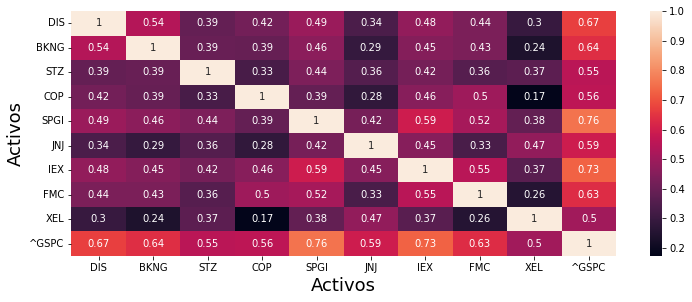

In [93]:
correlation_mat = data_instrumentos.corr()
plt.figure(figsize=(12.2,4.5))
sns.heatmap(correlation_mat, annot = True)
#plt.title('Matriz de Correlación')
plt.xlabel('Activos',fontsize=18)
plt.ylabel('Activos',fontsize=18)
plt.show()

Bueno, esta gráfica nos muestra que una gran correlación entre los instrumentos, lo justifica el bajo sharpe ratio obtenido. Este no sería un buen portafolio para invertir. 

Sin embargo, hay alternativas que se explicarán en el documento análiis técnico.